In [2]:
from eykthyr.eykthyr import Eykthyr, load_anndata
import scanpy as sc
from eykthyr.eykthyr import pl
%load_ext autoreload
%autoreload 2

# spatial ATAC-RNA

In [3]:
e = Eykthyr()

In [4]:
adrna = sc.read('data/mouse_embryo2_rna.h5ad')
adrna

AnnData object with n_obs × n_vars = 2187 × 20900
    obsm: 'spatial'

In [5]:
e.set_RNA([adrna])

/work/magroup/skrieger/newconda/envs/tangram3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


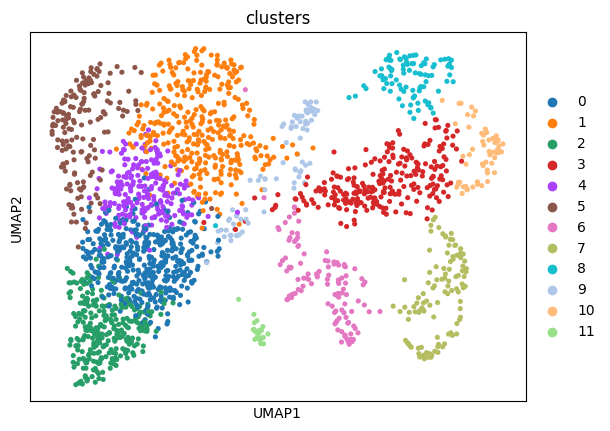

In [6]:
e.preprocess_rna(make_plots=True)

In [ ]:
e.compute_metagenes()

[AnnData object with n_obs × n_vars = 2187 × 15748
    obs: 'n_counts', 'clusters', 'adjacency_list'
    var: 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'spatial', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities', 'adjacency_matrix']


/work/magroup/skrieger/newconda/envs/tangram3/lib/python3.8/site-packages/popari/util.py:500: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  i = torch.LongTensor(indices)


In [ ]:
e.analyze_metagenes()

In [ ]:
e.compute_TF_activity(peak_tsvs=['data/spatialATACRNAmouseembryo2_peaks.tsv'],
                      archr_dataset_names=['spatialATACRNAmouseembryo2'],
                      motif_tsvs=['data/spatialATACRNAmouseembryo2_motifs.tsv'])

In [ ]:
e.compute_TF_metagene_weights()

In [ ]:
e.run_all_perturbations()

In [ ]:
e.save_anndata('eykthyrtest.h5ad')

In [ ]:
e2 = load_anndata('eykthyrtest.h5ad')

In [ ]:
pl.prep_paga(e, 'original_leiden')

In [ ]:
pl.paga_spatial_simulation(e, ['Msx1'], 'original_leiden')

In [ ]:
sc.pp.neighbors(e.perturbed_X[0], use_rep='spatial', key_added='spatial_neighbors')
nns = sc.Neighbors(e.perturbed_X[0], neighbors_key='spatial_neighbors')
nns.compute_neighbors(knn=False, use_rep='spatial', method='gauss')
ventricle_cells = e.perturbed_X[0][e.perturbed_X[0].obs['original_leiden'] == '7']
e.perturbed_X[0].obs['ventricle_distance'] = nns.distances[:,e.perturbed_X[0].obs['original_leiden'] == '7'].min(axis=1)

In [ ]:
ips = pl.development_simulation(e, ['Msx1'])